In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/
# !ls

/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from pandas.api.types import CategoricalDtype
from sklearn import preprocessing

In [4]:
data = pd.read_csv('NBA_Season_Data.csv')

# data.head()
# data.tail()
data.iloc[0:50,:]

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Player ID,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,...,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Production,Prod-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueSalary,TrueTimeVORP,Adjusted Production,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,8.0,25.8,17.0,6.8,0.9,1.1,13.5,23.3,NaN,1.5,5.0,6.5,0.086,NaN,-1.4,0.2,-1.2,0.7,0.020,0.066,20.2,robintr01,-1.61,19780,82,0.0,0.505,331339,0.512,-1.73,...,1.5,0.1,0.4,-1.6,0.9,44.4,42.3,-1.3,-1.2,0.6,0.6,-1.5,-1.4,0.2,0.2,0.1,0.1,0.4,0.4,"$3,900,000","$3,900,000",3.2,0.7,0.60,1.6,"$8,800,000",0.4,"$2,900,000",1.6,0.6,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,3.6,6.4,5.0,22.2,2.4,0.2,12.8,26.8,NaN,6.1,1.7,7.9,0.114,NaN,2.8,-1.2,1.6,3.0,0.089,0.025,23.4,smithra01,-3.25,19805,82,0.0,0.518,332955,0.517,0.52,...,1.5,-1.1,-0.8,4.4,0.8,40.4,38.5,1.8,1.5,3.1,3.1,3.1,2.6,4.0,4.0,-1.3,-1.1,-0.8,-0.8,"$16,200,000","$16,200,000",2.1,1.9,0.73,2.8,"$14,800,000",2.7,"$14,200,000",8.5,10.8,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,10.2,22.7,16.4,6.5,1.3,2.4,12.3,21.6,NaN,3.5,4.8,8.3,0.123,NaN,0.1,1.2,1.3,2.7,0.052,0.071,18.9,hayesel01,0.70,19830,82,0.0,0.506,336086,0.510,-1.31,...,1.5,1.0,1.3,-1.2,0.8,40.1,38.2,1.3,1.1,2.7,2.8,0.1,0.1,1.5,1.5,1.3,1.0,1.3,1.3,"$14,200,000","$14,400,000",2.6,1.9,0.73,2.8,"$14,700,000",2.4,"$12,700,000",7.4,3.9,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,8.0,25.6,17.0,15.7,1.4,1.1,13.9,18.8,NaN,6.1,4.8,10.8,0.162,NaN,1.8,2.1,4.0,4.8,0.091,0.071,16.2,cowenda01,-1.68,19830,82,0.0,0.505,332440,0.500,2.36,...,1.5,2.0,2.3,-0.6,0.8,41.8,39.7,4.4,3.6,5.2,5.5,1.9,1.5,2.9,3.1,2.5,2.0,2.3,2.4,"$26,100,000","$27,700,000",2.6,3.6,0.73,4.0,"$20,600,000",4.6,"$23,400,000",14.0,7.9,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,7.8,24.7,16.4,13.4,1.4,2.0,15.8,26.1,NaN,6.9,4.0,10.9,0.165,NaN,2.4,0.8,3.1,4.1,0.104,0.061,22.0,mcadobo01,-0.47,20005,82,0.0,0.528,333391,0.518,1.37,...,1.5,0.7,1.0,1.6,0.8,40.3,38.3,3.4,2.7,4.3,4.5,2.5,2.0,3.3,3.5,0.9,0.7,1.0,1.0,"$21,800,000","$22,600,000",2.5,3.0,0.73,3.6,"$18,500,000",3.9,"$19,900,000",11.6,9.0,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0
5,1978,NJN,Bernard King,21,79,3092,17.3,0.511,NaN,0.277,7.9,16.0,11.8,9.9,1.7,0.6,14.3,26.0,NaN,2.6,3.3,5.9,0.092,NaN,1.0,0.0,0.9,2.3,0.041,0.051,22.3,kingbe01,-4.89,19905,82,0.0,0.485,332793,0.478,-0.22,...,1.5,-0.1,0.1,1.3,0.8,39.1,37.3,1.0,0.8,2.3,2.4,1.2,0.9,2.2,2.3,-0.2,-0.1,0.1,0.1,"$12,200,000","$12,600,000",1.6,1.3,0.69,2.3,"$11,900,000",2.1,"$10,900,000",6.2,6.0,0.2,5.5,2.8,3.0,21.16,0.0,79.0,205.0,3.0,21.0
6,1978,CHI,Artis Gilmore,28,82,3067,23.5,0.604,NaN,0.531,11.3,26.6,19.0,14.0,0.6,3.2,19.1,25.3,NaN,7.8,3.7,11.5,0.180,NaN,3.2,1.0,4.2,4.8,0.122,0.058,20.5,gilmoar01,-0.79,19755,82,0.0,0.524,327657,0.505,2.58,...,1.5,0.9,1.2,2.1,0.8,37.4,35.7,4.6,3.5,5.1,5.1,3.3,2.6,3.9,3.9,1.2,0.9,1.2,1.2,"$25,600,000","$25,600,000",1.9,3.3,0.73,3.9,"$19,700,000",4.8,"$24,000,000",13.7,10.6,3.2,12.8,5.0,5.0,28.36,6.0,86.0,240.0,5.0,28.0
7,1978,DEN,David Thompson,23,80,3025,23.2,0.578,NaN,0.422,5.5,7.7,6.6,19.3,1.3,1.7,11.5,26.8,NaN,10.8,1.9,12.7,0.202,NaN,4.6,-1.4,3.2,4.0,0.172,0.030,23.7,thompda01,0.75,19830,82,0.0,0.531,329852,0.517,1.10,...,1.5,-1.1,-0.9,6.6,0.8,37.8,36.0,3.6,2.8,4.3,4.4,5.1,3.9,5.2,5.3,-1.5,-1.1,-0.9,-0.9,"$21,800,000","$22,400,000",2.2,3.0,0.73,3.6,"$18,500,000",4.1,"$20,800,000",11.6,14.1,-2.4,11.1,1.6,2.0,23.56,2.0,76.0,195.0,2.0,24.

In [5]:
data.columns.unique()

Index(['Year', 'Tm', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       ...
       'D-WORP', 'Adjusted WORP', 'Estimated Position', 'BBRef Pos',
       'Age on Feb 1', 'Yrs Experience', 'Height', 'Weight',
       'Rounded Position', 'Rounded Age'],
      dtype='object', length=109)

In [6]:
#tipovi podataka
data.dtypes

Year                  int64
Tm                   object
Player               object
Age                   int64
G                     int64
                     ...   
Yrs Experience      float64
Height              float64
Weight              float64
Rounded Position    float64
Rounded Age         float64
Length: 109, dtype: object

In [7]:
print(data["Tm"].unique())

['NOJ' 'BUF' 'WSB' 'BOS' 'NYK' 'NJN' 'CHI' 'DEN' 'GSW' 'IND' 'KCK' 'HOU'
 'SEA' 'CLE' 'SAS' 'LAL' 'PHI' 'MIL' 'POR' 'PHO' 'DET' 'ATL' 'SDC' 'UTA'
 'DAL' 'LAC' 'SAC' 'MIA' 'CHH' 'MIN' 'ORL' 'TOR' 'VAN' 'WAS' 'MEM' 'NOH'
 'CHA' 'NOK' 'OKC' 'BRK' 'NOP' 'CHO']


In [8]:
data.shape

(17729, 109)

In [11]:
data.isnull().sum(axis=0) 

Year                  0
Tm                    0
Player                0
Age                   0
G                     0
                   ... 
Yrs Experience      468
Height              468
Weight              468
Rounded Position      2
Rounded Age         468
Length: 109, dtype: int64

In [15]:
data = data.fillna(0.0)

In [16]:
data.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,Defense,Val/Shot,Offense,...,OStdErr,Ocontrib,OVORP,DBPM.1,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueTimeVORP,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
count,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.00000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.0,17729.000000,17729.000000,17729.000000,17729.000000,17729.0,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,...,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000
mean,1999.166958,26.087145,47.639686,1132.965706,12.138818,0.487776,0.140694,0.312739,6.086914,13.33439,9.713447,12.775622,1.614197,1.397795,14.733070,18.470506,0.0,1.231683,1.160263,2.392814,0.064559,0.0,-1.575814,-0.456016,-2.032100,0.581612,0.019618,0.044969,15.720238,-0.212464,18611.065768,76.993062,0.155934,0.531960,319278.009871,0.518075,-0.701494,-0.058931,-0.053375,-0.575336,...,2.038806,0.000818,0.507981,-0.508179,2.239653,0.000429,0.090163,-1.198584,0.296356,19.716166,17.726843,-2.214643,0.000750,0.597913,0.510835,-1.706927,0.000818,0.507981,0.469118,-0.508179,0.000429,0.090163,0.041965,-1.685464,-1.735355,0.275440,0.697073,0.797467,1.612392,1.371589,0.241593,2.152518,2.805488,2.945372,26.638925,4.258503,76.750973,208.373005,2.803204,26.719838
std,11.119839,5.816735,28.289753,949.747290,6.701130,0.129718,0.181837,0.236725,5.082961,6.94874,5.299690,9.703657,1.086674,1.825593,7.586134,6.274523,0.0,2.048438,1.242047,2.996896,0.106949,0.0,3.643102,2.094373,4.440091,1.287562,0.101378,0.038355,5.606620,4.859220,4089.793018,16.915624,0.082888,0.020008,70310.984720,0.087420,2.532937,1.512404,0.282120,3.232243,...,1.476616,0.947488,1.176551,2.313489,1.560808,0.667621,0.679227,4.260212,0.245164,10.745024,10.547312,4.863170,1.108179,1.381925,1.693807,3.943066,0.947488,1.176551,1.432984,2.313489,0.667621,0.679227,0.839151,2.249949,2.559749,0.267642,1.170216,1.420133,3.730812,3.175779,1.834127,3.834770,1.410889,1.476182,6.251669,3.845272,13.325651,43.895859,1.450297,6.268418
min,1978.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-3.100000,-1.000000,-1.600000,-2.519000,0.0,-65.900000,-26.300000,-73.900000,-2.500000,-3.660000,-0.761000,0.000000,-17.280000,1198.000000,5.000000,0.000000,0.468000,20514.000000,0.000000,-21.850000,-3.160000,-1.450000,-72.850000,...,0.000000,-3.400000,-2.400000,-30.400000,0.000000,-3.600000,-3.400000,-73.600000,0.000000,0.000000,0.000000,-86.700000,-4.400000,-3.300000,-7.500000,-73.800000,-3.400000,-2.400000,-6.300000,-30.400000,-3.600000,-3.400000,-3.800000,-7.900000,-8.300000,0.000000,-0.100000,-0.600000,-8.900000,-6.400000,-9.200000,-1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,23.000000,21.000000,239.000000,9.400000,0.466000,0.001000,0

In [17]:
data_numerical = data.select_dtypes(include=[np.number])
data_numerical.columns.unique()

Index(['Year', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       ...
       'D-WORP', 'Adjusted WORP', 'Estimated Position', 'BBRef Pos',
       'Age on Feb 1', 'Yrs Experience', 'Height', 'Weight',
       'Rounded Position', 'Rounded Age'],
      dtype='object', length=101)

In [24]:
data = data.select_dtypes(include=[np.number])
data["Rounded Position"] = data["Rounded Position"] .astype(int)
data["Rounded Position"] 

0        4
1        1
2        4
3        4
4        4
        ..
17724    0
17725    0
17726    0
17727    0
17728    0
Name: Rounded Position, Length: 17729, dtype: int64

In [25]:
X = data.drop(labels = "Rounded Position", axis = 1)
print(X.shape)

y = data["Rounded Position"]
print(y.shape)

(17729, 100)
(17729,)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

rg = Ridge()
rg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
y_pred_rg = rg.predict(X_test)

y_pred_lr = lr.predict(X_test)
y_pred_lr_prob = lr.predict_proba(X_test)

In [48]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,confusion_matrix

acc_lr_test = accuracy_score(y_test, y_pred_lr)
# roc_lr_test = roc_auc_score(y_test, y_pred_lr_prob[:,1])
prec_lr_test = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr_test = recall_score(y_test, y_pred_lr,  average='weighted')

print('ACC: {} \n\nPrecision: {}\nRecall: {}'.format(acc_lr_test, prec_lr_test, recall_lr_test))

ACC: 0.9306260575296108 

Precision: 0.930882316430042
Recall: 0.9306260575296108


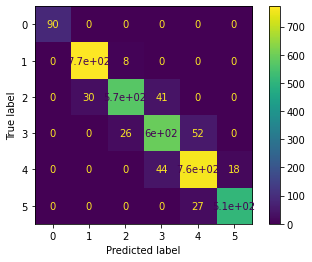

In [49]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test)

In [50]:
print(y_pred_lr)
print(confusion_matrix(y_pred_lr, y_test))

[2 5 5 ... 5 1 5]
[[ 90   0   0   0   0   0]
 [  0 772  30   0   0   0]
 [  0   8 571  26   0   0]
 [  0   0  41 595  44   0]
 [  0   0   0  52 762  27]
 [  0   0   0   0  18 510]]


In [51]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [58]:
### Logisticka regresija

params = [{'C':[0.001],'penalty':['none','l2']}] 

logreg = LogisticRegression(solver = 'newton-cg')

grid = GridSearchCV(logreg, params, cv=3, scoring='f1_weighted')
grid.fit(X_train,y_train)

print('Najbolje vrednosti parametra: ', grid.best_params_)
print(grid.cv_results_['mean_test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Sett

Najbolje vrednosti parametra:  {'C': 0.001, 'penalty': 'none'}
[0.965797   0.29064884]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [62]:
grid_test = grid.predict(X_test)
grid_test_proba = grid.predict_proba(X_test)

acc_lr_test = accuracy_score(y_test, grid_test)
# roc_lr_test = roc_auc_score(y_test, grid_test_proba[:,1])
prec_lr_test = precision_score(y_test, grid_test, average='weighted')
recall_lr_test = recall_score(y_test, grid_test, average='weighted')

print('ACC: {} \nPrecision: {}\nRecall: {}'.format(acc_lr_test, prec_lr_test, recall_lr_test))

ACC: 0.9723632261703328 

Precision: 0.9723421224142128
Recall: 0.9723632261703328


In [63]:
### KNN
parameters = {'n_neighbors': [3,5,7,9,11,13,15], 'metric': ['euclidean', 'manhattan','chebyshev']}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, parameters, cv=5, scoring='f1_weighted')
grid.fit(X_train,y_train)

print('Najbolje vrednosti parametra: ', grid.best_params_)

Najbolje vrednosti parametra:  {'metric': 'manhattan', 'n_neighbors': 15}


In [64]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [65]:
mutual_info_classif(X_train,y_train)

array([0.10010099, 0.12620093, 0.12097853, 0.12173321, 0.1102292 ,
       0.09822116, 0.22317689, 0.11548012, 0.46717006, 0.55759992,
       0.68728075, 0.46796113, 0.17281599, 0.37972495, 0.12470853,
       0.13408283, 0.00702565, 0.05920413, 0.06044236, 0.06317988,
       0.12308129, 0.00811993, 0.1322627 , 0.18660509, 0.10351351,
       0.0473773 , 0.10669811, 0.17399398, 0.12919259, 0.03985608,
       0.08196418, 0.10601545, 0.09513363, 0.03691863, 0.02425773,
       0.12321011, 0.19918765, 0.12519931, 0.28933848, 0.1935349 ,
       0.11668085, 0.12316155, 0.09542644, 0.03563803, 0.04915091,
       0.09590336, 0.12970626, 0.06464198, 0.05895278, 0.09680042,
       0.16147916, 0.12331844, 0.23343026, 0.07625886, 0.1348294 ,
       0.09080707, 0.03942588, 0.03520285, 0.00777092, 0.0465047 ,
       0.12133348, 0.1213236 , 0.09220335, 0.09008644, 0.1988704 ,
       0.12732682, 0.1420197 , 0.13744806, 0.20453105, 0.04298271,
       0.12203938, 0.13076557, 0.11168193, 0.07726997, 0.05769

In [66]:
best = SelectKBest(k=15, score_func=mutual_info_classif)

In [67]:
best.fit(X_train,y_train)
best.scores_

array([0.0997913 , 0.13639348, 0.12751311, 0.12848769, 0.11690971,
       0.10450864, 0.23453796, 0.11925116, 0.45981364, 0.55926759,
       0.67652081, 0.46513101, 0.17701682, 0.38348472, 0.12795634,
       0.13547669, 0.        , 0.05856405, 0.06712862, 0.0639954 ,
       0.12477982, 0.        , 0.12896569, 0.18859082, 0.08858904,
       0.04692828, 0.10696782, 0.18104242, 0.12415189, 0.03925837,
       0.07753021, 0.09110021, 0.09205579, 0.03607551, 0.02595875,
       0.11714576, 0.2008505 , 0.13594628, 0.29406305, 0.19107701,
       0.11130693, 0.12091774, 0.10037024, 0.04104484, 0.05013524,
       0.10618203, 0.11755106, 0.08080013, 0.05397517, 0.09699466,
       0.16953098, 0.12920997, 0.22391951, 0.08427137, 0.13388198,
       0.0967126 , 0.03608257, 0.02588695, 0.01084318, 0.04870314,
       0.13074746, 0.12608371, 0.09540839, 0.08035121, 0.18933504,
       0.12289429, 0.14509245, 0.13654241, 0.20847699, 0.044038  ,
       0.12052836, 0.13184666, 0.09849637, 0.06851758, 0.05082

In [68]:
best.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False])

In [74]:
X_reduced_train = pd.DataFrame(best.transform(X_train), columns=X_train[0,best.get_support()])

In [75]:
X_reduced_test = pd.DataFrame(best.transform(X_test), columns=X_test[0,best.get_support()])

In [82]:
parameters = {'n_neighbors': [15], 'metric': ['manhattan']}
grid = GridSearchCV(knn, parameters, cv=5, scoring='f1_weighted')
grid.fit(X_reduced_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['manhattan'], 'n_neighbors': [15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [83]:
grid_test = grid.predict(X_reduced_test)
grid_test_proba = grid.predict_proba(X_reduced_test)

acc_lr_test = accuracy_score(y_test, grid_test)
# roc_lr_test = roc_auc_score(y_test, grid_test_proba[:,1])
prec_lr_test = precision_score(y_test, grid_test, average='weighted')
recall_lr_test = recall_score(y_test, grid_test, average='weighted')

print('ACC: {} \nPrecision: {}\nRecall: {}'.format(acc_lr_test, prec_lr_test, recall_lr_test))

ACC: 0.9452904681331077 
Precision: 0.9457096453928469
Recall: 0.9452904681331077


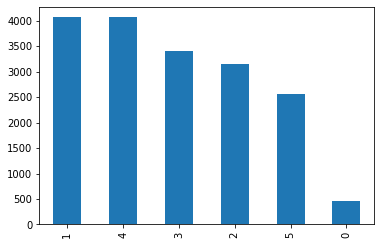

In [84]:
data['Rounded Position'].value_counts().plot(kind='bar')